<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/6_classical_machine_learning_with_scikit-learn/1_linear_models_for_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Linear Models for Regression

Early in the previous parts, we saw that regression is a supervised learning type in which we are predicting a continous value. Take an example, given the information about a house such as its region, size, number of bedrooms, can you predict the price of the house? 


That is in fact what you will see in this lab and to achieve that, we will use Regression models available in Scikit-Learn. 

Let's get started. How exciting is that!!

As much as we can, we will try to structure all machine learning projects in accordance to the standard ML worklow. Here are the typical steps that you will see in most ML projects: 

* [1. Problem formulation](#1)
* [2. Collecting the data](#2)
* [3. Exploraroty Data Analysis](#3)
* [4. Data Processing](#4)
* [5. Choosing and Training a model](#5)
* [6. Evaluating a model](#6)
* [7. Improving a model](#7)


<a name='1'></a>

## 1. Problem Formulation

Here is the problem. There is a real state agent who knows that you're a Machine Learning Engineer and would like you to help out with building a machine learning model that can predict the price of the house given the information about that particular house. 

The idea of creating a model clicked and replied, oh, yeah, that sounds cool! Let's do it!! 

You have understood the problem and probably you already have an idea of type of models you will use. You know there are so many models such as random forests, decision trees, and neural networks but you have learned that it's always okay to start simple and so, now you know you will use Linear Regression as this is not a complex problem. 

Understanding the problem well goes beyond determining the right models for the problem, but also to doing effecting data processing and error analysis as you will be finding out. 

It's time to collect the data now. 

<a name='2'></a>

## 2. Collecting the data

Ideally, the real estate agent would hand you his/her housing data but unfortunately he/she told you, that the model will be used in California, so it's okay to use the California housing dataset available on public and free to use. 

So, we will collect the data from the internet. Fortunately, Scikit-Learn provides the exact same data. Let's load it but first, let's import all relavant libraries that we will need. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

In [3]:
# Loading the data

X, y = fetch_california_housing(return_X_y=True)

In [4]:
type(X)

numpy.ndarray

In [5]:
type(y)

numpy.ndarray

Now that we have the dataset, we can try to see what it looks like. X is training data and y is training labels. 

But wait, the data from Sklearn is a NumPy array and it seems it prepared to be fed to the model directly. That could easier, but quite often, real world data they are not like that. We often have to do our work in order to process it to be fed to the ML model. 

Let's get the real data. You can learn more about the data at [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices).

In [6]:
import urllib.request 

data_path = 'https://raw.githubusercontent.com/nyandwi/public_datasets/master/housing.csv'

def download_read_data(path):
    
    """
     Function to retrieve data from the data paths
     And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    
      ## Only retrieve the directory of the data

    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(path)
    
    return data

Now that we have real world data, let's see how it looks like. 

In [7]:
cal_data = download_read_data(data_path)

In [8]:
cal_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
cal_data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND



```
Information about the features 

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housing_median_age: Median age of a house within a block; a lower number is a newer building
4. total_rooms: Total number of rooms within a block
5. total_bedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. median_income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. median_house_value: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Source: Kaggle
```


In [10]:
cal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
len(cal_data)

20640

In [12]:
len(cal_data.columns)

10

So, we have 20640 data points and 10 features. In those 10 features, 9 features are input features and the feature `median_house_value` is the target variable/label. 

<a name='3'></a>

## 3. Exploratory Data Analysis

This is where we are going to understand more about the data. But before we get there, let's split the data into training and testing sets. This is because on the course of data analysis and processing, there can be `data leakage`. Put it in other words, we don't want the model to see the data that it will be tested on. If it does, it will show that it can make good predictions (or generalize well) on test data because it saw it, but it will fail on giving accurate predictions on the future data. 

As a side notes, training set is used during the model training, and testing set is used during the model evaluation. As we go we will try to explain some terminologies! ML is huge :)


So to split the data, sklearn provides a function for that. 

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(cal_data, test_size=0.1,random_state=20)

In [14]:
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 18576 
The size of testing data is: 2064


As you can see, we have allocated 10 percent of the full data to the test set.

In [15]:
# Let's copy the training data to revert it in case we mess things up

cal_train = train_data.copy()

### Checking data statistics

In [16]:
# By default, describe shows the stats of the numerical features. 
# include paramater gives us option to show all features 

train_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,18576.0,NaN,NaN,NaN,-119.56753,2.000581,-124.35,-121.79,-118.49,-118.01,-114.49
latitude,18576.0,NaN,NaN,NaN,35.630217,2.13326,32.54,33.93,34.26,37.71,41.95
housing_median_age,18576.0,NaN,NaN,NaN,28.661068,12.604039,1.0,18.0,29.0,37.0,52.0
total_rooms,18576.0,NaN,NaN,NaN,2631.567453,2169.46745,2.0,1445.0,2127.0,3149.0,39320.0
total_bedrooms,18390.0,NaN,NaN,NaN,537.344698,417.672864,1.0,295.0,435.0,648.0,6445.0
population,18576.0,NaN,NaN,NaN,1422.408376,1105.486111,3.0,785.75,1166.0,1725.0,28566.0
households,18576.0,NaN,NaN,NaN,499.277078,379.473497,1.0,279.0,410.0,606.0,6082.0
median_income,18576.0,NaN,NaN,NaN,3.870053,1.900225,0.4999,2.5643,3.5341,4.742725,15.0001
median_house_value,18576.0,NaN,NaN,NaN,206881.011305,115237.605962,14999.0,120000.0,179800.0,264700.0,500001.0
ocean_proximity,18576,5,<1H OCEAN,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking Missing Values

In [17]:
train_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        186
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We only have missing values in the `total_bedrooms` feature. To g beyond a little bit, here is the percentage of the missing values in such feature.  

In [18]:
print('The Percentage of missing values in total_bedrooms is: {}%'.format(train_data.isnull().sum()['total_bedrooms'] / len(train_data) * 100))

The Percentage of missing values in total_bedrooms is: 1.0012919896640826%


### Checking Values in the Categorical Feature(s)

In [19]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

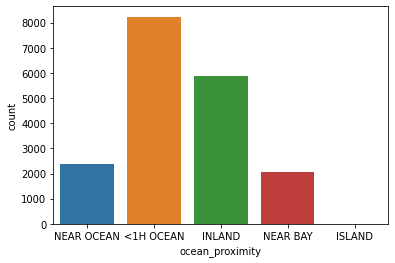

In [20]:
sns.countplot(data=train_data, x='ocean_proximity')

### Checking Correlation Between Features

In [21]:
correlation = train_data.corr()
correlation['median_house_value']

longitude            -0.048622
latitude             -0.142543
housing_median_age    0.105237
total_rooms           0.133927
total_bedrooms        0.049672
population           -0.026109
households            0.065508
median_income         0.685433
median_house_value    1.000000
Name: median_house_value, dtype: float64

<AxesSubplot:>

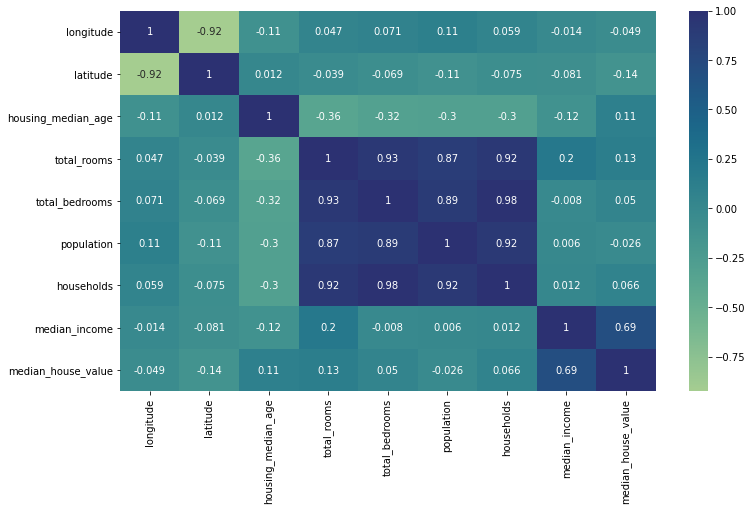

In [22]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

Some features like total_bedrooms and households are highly correlated. Same things for `total_bedrooms` and `total_rooms` and that makes sense because for many houses, the number of people who stay in that particular house (`households`) goes with the number of available rooms(`total_rooms`) and `bed_rooms`. 

The other interesting insights is that the `price of the house` is closely correlated with the `median income`, and that makes sense too. For many cases, you will resonably seek house that you will be able to afford based on your income. 

### Plotting Geographical Features

Since we have latitude and longitude, let's plot it. It can help us to know the location of certain houses on the map and hopefully this will resemble [California map](https://commons.wikimedia.org/wiki/File:Geologic_map_California.jpg#/media/File:Geologic_map_California.jpg).

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

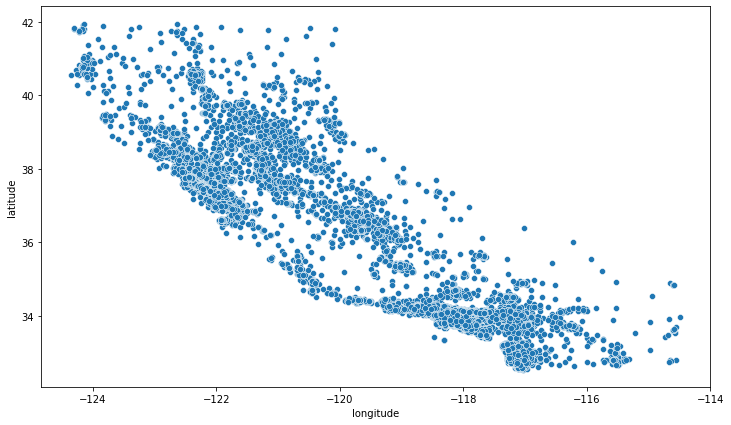

In [23]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

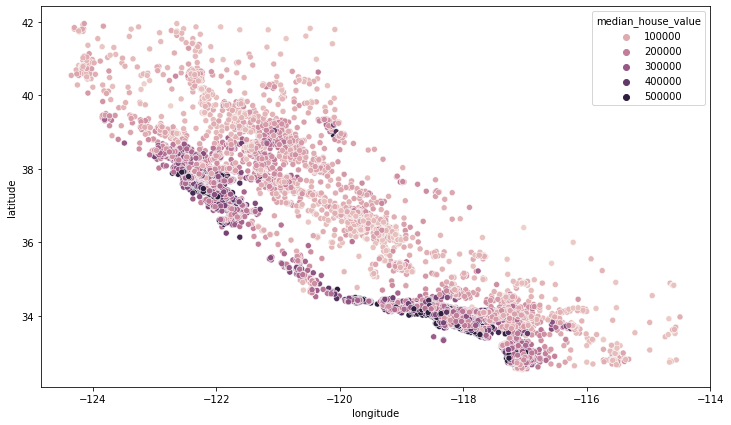

In [24]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='median_house_value')

It makes sense that the most expensive houses are those close to sea. We can verify that with the `ocean_proximity`.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

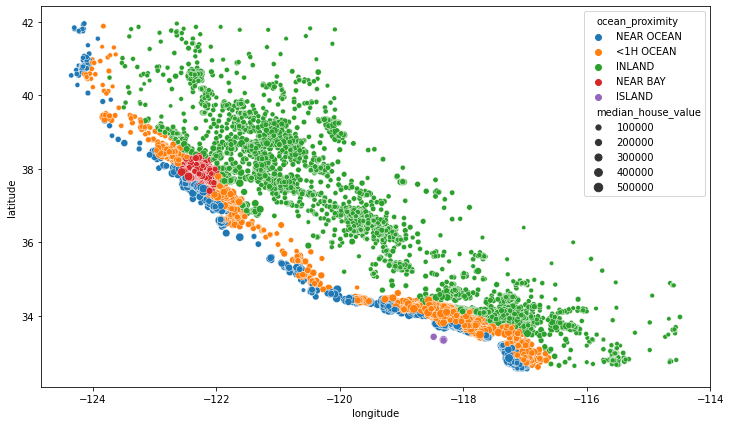

In [25]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='longitude', y='latitude', hue='ocean_proximity', 
                size='median_house_value')

Yup, all houses near the ocean are very expensive compared to other areas. 

### Exploring Relationship Between Individual Features

Below is the relationship between median income and the price of the house. 

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

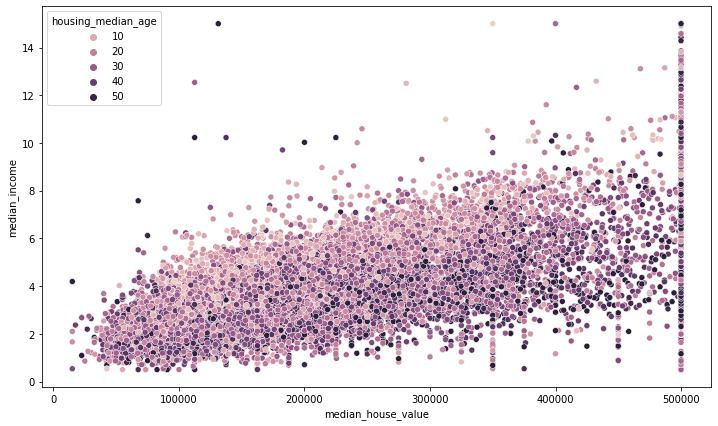

In [26]:
plt.figure(figsize=(12,7))

sns.scatterplot(data = train_data, x='median_house_value', y='median_income', hue='housing_median_age')

There are times you want to quickly see different plots to draw insights from the data. In that case, you can use grid plots. Seaborn, a visualization library provides a handy function for that. 

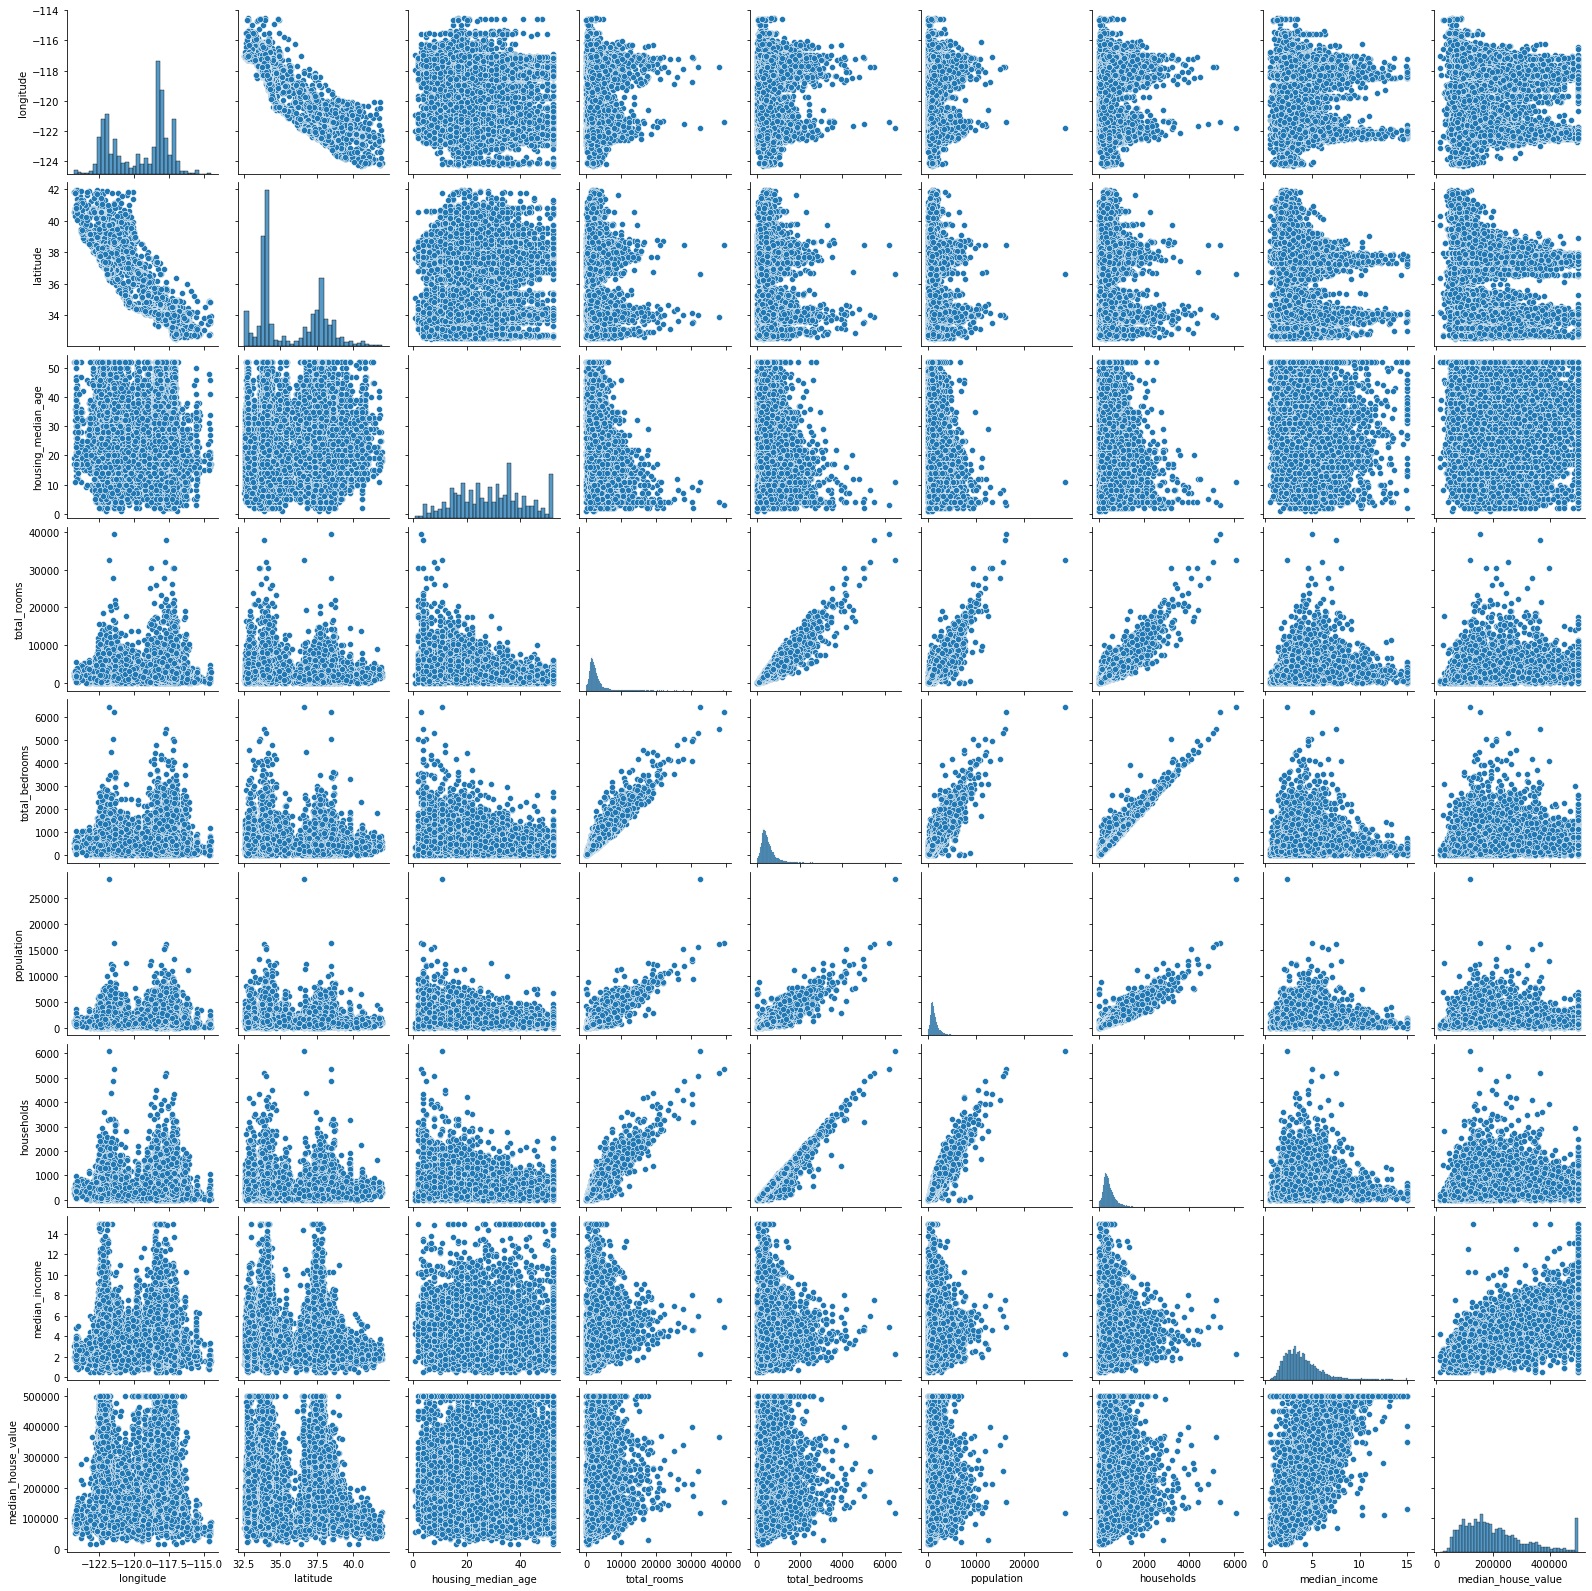

In [27]:
sns.pairplot(train_data)

As you can see, it plots the relationship between all numerical features and histograms of each feature as well. But it's slow...

To summarize the data exploration, the goal here it to understand the data as much as you can. There is no limit to what you can inspect. And understanding the data will help you build an effective ML systems. 

<a name='4'></a>

## 4. Data Preprocessing 

In this part, it's where we prepare the data to be in proper format that will be accepted by the ML model. The processing functions that we apply to training set must also be applied to the test set.

Here are three most things that we will take care of in our dataset:

* Missing values
* Encoding categorical features 
* Scaling numerical features


As much as we can we will use functions so that we can rerun the same transformations on the test set. 

Since we are going to prepare the data for the ML model, let's create an input training data and the training label, label being `median_house_value`. Since the data is a Pandas dataframe, we will use `drop` function. Let's do that!

In [28]:
training_input_data = train_data.drop('median_house_value', axis=1)
training_labels = train_data['median_house_value']

In [29]:
training_input_data.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8101,-118.21,33.80,41.0,1251.0,279.0,1053.0,278.0,3.2778,NEAR OCEAN
9757,-121.44,36.51,31.0,1636.0,380.0,1468.0,339.0,3.2219,<1H OCEAN
16837,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,NEAR OCEAN


In [30]:
training_labels.head()

8101     150800.0
9757     114700.0
16837    273000.0
11742    193100.0
1871     173400.0
Name: median_house_value, dtype: float64

Great, input training data no longer contain the label. 

### Handling Missing Values

Missing values are inevitable in real world datasets, so it's good to know how to handle them. 

There are three options when dealing with missing values. You can:

* Remove them completely
* Fill them with different strategies such as mean, median, frequent, or constant. 
* Leave them as they are. Most ML models don't appreciate missing values, and so they can't handle them but there are some models which are not affected by missing values, such as tree based algorithms. Since we are working with linear models for now, this is not an option. 


Sklearn provides a function called `SimpleImputer` to fill missing values. Let' use it. We will fill the values with the mean of the concerned features. You can also use median, or most frequent values. 

In [31]:
from sklearn.impute import SimpleImputer

# We are going to impute all numerical features
# Ideally, we would only impute bed_rooms because it's the one possessing NaNs

num_feats = training_input_data.drop('ocean_proximity', axis=1)

In [32]:
def handle_missing_values(input_data):
  """
  Docstring 

  # This is a function to take numerical features...
  ...and impute the missing values
  # We are filling missing values with mean
  # fit_transform fit the imputer on input data and transform it immediately
  # You can use fit(input_data) and then transform(input_data) or
  # Or do it at once with fit.transform(input_data)
  # Imputer returns the imputed data as a NumPy array 
  # We will convert it back to Pandas dataframe

  """
  mean_imputer = SimpleImputer(strategy='mean')
  num_feats_imputed = mean_imputer.fit_transform(input_data)
  num_feats_imputed = pd.DataFrame(num_feats_imputed, 
                            columns=input_data.columns, index=input_data.index )


  return num_feats_imputed

In [33]:
num_feats_imputed = handle_missing_values(num_feats)
num_feats_imputed.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

The feature `total_bedroom` was the one having missing values. Looking above, we no longer have the missing values in whole dataframe. 

### Encoding Categorical Features

Categorical features are features which have categorical values. An example in our dataset is `ocean_proximity` that has the following values.

In [34]:
training_input_data['ocean_proximity'].value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

So we have 5 categories: `<1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND`. 


There are many ways to handle categorical features but in this project, we will only look at 3 techniques which are simple Python Mapping, Ordinary Encoding, and One Hot Encoding. Label and One Hot can be implemented easily in Sklearn. 

#### Mapping 

Mapping is simple. We create a dictionary of categorical values and their corresponding numerics. And after that, we map it to the categorical feature. 

Here is how it is implemented.

In [35]:
cat_feats = training_input_data['ocean_proximity']
cat_feats.value_counts()

<1H OCEAN     8231
INLAND        5896
NEAR OCEAN    2384
NEAR BAY      2061
ISLAND           4
Name: ocean_proximity, dtype: int64

In [36]:
feat_map = {
      '<1H OCEAN': 0,
      'INLAND': 1,
      'NEAR OCEAN': 2,
      'NEAR BAY': 3, 
      'ISLAND': 4
}

cat_feats_encoded = cat_feats.map(feat_map)

In [37]:
cat_feats_encoded.head()

8101     2
9757     0
16837    2
11742    1
1871     1
Name: ocean_proximity, dtype: int64

Cool, all categories were mapped to their corresponding numerals. That is actually encoding. We are converting the categories (in text) into numbers, typically because ML models expect numeric inputs. 

#### Handling Categorical Features with Sklearn

Sklearn has many preprocessing functions to handle categorical features. Ordinary Encoder is one of them. It does the same as what we did before with mapping. The only difference is implementation. 

In [38]:
from sklearn.preprocessing import OrdinalEncoder

def ordinary_encoder(input_data):
  
  encoder = OrdinalEncoder()
  
  output = encoder.fit_transform(input_data)

  return output

In [39]:
cat_feats_enc = label_encoder(cat_feats)
cat_feats_enc

array([4, 0, 4, ..., 0, 0, 3])

#### One Hot Encoding

One hot encoding is most preferred when the categories are not in any order and that is exactly how our categorical feature is. This is what I mean by saying unordered categories: If you have 3 cities and encode them with numbers (1,2,3) respectively, a machine learning model may learn that city 1 is close to city 2 and to city 3. As that is a false assumption to make, the model will likely give incorrect predictions if the city feature plays an important role in the analysis. 

On the flip side, if you have the feature of ordered ranges like low, medium, and high, then numbers can be an effective way because you want to keep the sequence of these ranges.

In our case, the ocean proximity feature is not in any order. By using one hot, The categories will be converted into binary representation (1s or 0s), and the orginal categorical feature will be splitted into more features, equivalent to the number of categories. 

In [40]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(input_data):

  one_hot_encoder = OneHotEncoder()
  output = one_hot_encoder.fit_transform(input_data)
  
  # The output of one hot encoder is a sparse matrix. 
  # It's best to convert it into numpy array 
  output = output.toarray()

  return output

In [41]:
cat_feats = training_input_data[['ocean_proximity']]

cat_feats_hot = one_hot(cat_feats)

cat_feats_hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Cool, we now have one hot matrix, where categories are represented in 1s or 0s. As one hot create more additional features, if you have a categorical feature having many categories, it can be too much, hence resulting in poor performance.  

### Scaling Numerical features

After we have imputed missing values, and converted categorical features into numbers, it's time to scale the numerical features. 

But why do we have to scale numerical features? Most machine learning models will work well when given small input values, and best if they are in the same range. 

For that reason, there are two most techniques to scale features:

* Normalization where the features are scaled to values between 0 and 1. And 
* Standardization where the features are rescaled to have 0 mean and unit standard deviation. When working with datasets containing outliers (such as time series), standardization is the right option in that particular case. 

Both of those techniques are implemented quite easily in Sklearn, Normalization with `MinMaxScaler`, and standardization with `StandardScaler`. 

In [42]:
## Normalizing numerical features 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[0.62271805, 0.13390011, 0.78431373, ..., 0.03676084, 0.04555172,
        0.19157667],
       [0.29513185, 0.4218916 , 0.58823529, ..., 0.05129013, 0.05558296,
        0.18772155],
       [0.18965517, 0.53666312, 0.54901961, ..., 0.09736372, 0.1516198 ,
        0.3378712 ],
       ...,
       [0.74340771, 0.02763018, 0.58823529, ..., 0.03942163, 0.07383654,
        0.27298934],
       [0.61663286, 0.16578108, 0.78431373, ..., 0.04764906, 0.11609933,
        0.36398808],
       [0.19269777, 0.55791711, 0.88235294, ..., 0.02653783, 0.07432988,
        0.22199004]])

In [43]:
## Standardizing numerical features 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

So far, everything we have been doing is kind of exploring different possibilities available when cleaning or preparing data to the machine learning model, and as you may have saw, we didn't care much after the order. 

For the next step (and final) one, we are going to put everything together into a single Pipeline. Whenever possible, it's very nice to create a data pipelines which can do all preprocessing at once without having to run each individual function. 

Let's review it. Again, this is going to be only long lab. In the next models, since most things will be already covered, they won't be as long as this one. 

### Putting All Data Preprocessing Steps Into A Single Pipeline 

Having data pipelines allows us to run data processing seamlessly. In this final step, we are going to do two things:

* Creating a numerical pipeline having all numerical preprocessing steps (handling missing values and standardization) 
* Creating a categorical pipeline to encode the categorical features
* Combining both pipelines into one pipeline. 

Let's do it!!

#### Creating a numerical features pipeline



In [44]:
from sklearn.pipeline import Pipeline

In [45]:
num_feats_pipe = Pipeline([
                  ('imputer', SimpleImputer(strategy='mean')), 
                  ('scaler', StandardScaler())         
            ])

num_feats_preprocessed = num_feats_pipe.fit_transform(num_feats)

In [46]:
num_feats_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ..., -0.33416821,
        -0.58313172, -0.31168387],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.04124236,
        -0.42237836, -0.34110223],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  1.23170093,
         1.11663747,  0.80468775],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ..., -0.26541833,
        -0.12985994,  0.30957512],
       [ 0.64859406, -0.71733307,  0.97899282, ..., -0.05283644,
         0.54741244,  1.00398532],
       [-1.44085502,  1.01246024,  1.37570172, ..., -0.59831252,
        -0.12195403, -0.07959982]])

How cool is that!! With only just handful of codes, we made a pipeline which can take numerical features, impute the missing values, and scale the features as well. Those two preprocessing steps happened in sequence, and that's how Sklearn pipeline works. 

You can access the transformation steps. Here is how:

In [47]:
num_feats_pipe.steps[0]

('imputer', SimpleImputer())

In [48]:
num_feats_pipe.steps[1]

('scaler', StandardScaler())

#### Pipeline for transforming Categorical Features

Even if we are only encoding categorical features, let's still use a pipeline for identity. And if you had more preprocessing functions to be done on the categorical features, you can add them in the pipeline. 

In [49]:
cat_feats_pipe = Pipeline([
     ('encoder', OneHotEncoder())                      
])

cat_feats_preprocessed = cat_feats_pipe.fit_transform(cat_feats)

Like we saw early, the output of one hot is a sparse matrix. 

In [50]:
type(cat_feats_preprocessed)

scipy.sparse.csr.csr_matrix

#### Final Data Processing Pipeline

Here, we are going to make a single tranformer which will do all numerical and categorical features transformations. We will use `ColumnTransformer` for that purpose. Learn more about it from the [official documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose). 

In [51]:
from sklearn.compose import ColumnTransformer

# The transformer requires lists of features

num_list = list(num_feats)
cat_list = list(cat_feats)

final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', cat_feats_pipe, cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

In [52]:
training_data_preprocessed

array([[ 0.67858615, -0.85796668,  0.97899282, ...,  0.        ,
         0.        ,  1.        ],
       [-0.93598814,  0.41242353,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [-1.45585107,  0.9187045 ,  0.02689146, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.27342931, -1.32674535,  0.18557502, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64859406, -0.71733307,  0.97899282, ...,  0.        ,
         0.        ,  0.        ],
       [-1.44085502,  1.01246024,  1.37570172, ...,  0.        ,
         1.        ,  0.        ]])

In [53]:
type(training_data_preprocessed)

numpy.ndarray

If we wanted, we could have immediately encoded the categorical feature without having to create its pipeline. But instead pass `OneHotEncoder()` immediately. But it's same things, the difference is that this is simple. 

In [54]:
final_pipe = ColumnTransformer([
   ('num', num_feats_pipe, num_list),    
   ('cat', OneHotEncoder(), cat_list)                        

])

training_data_preprocessed = final_pipe.fit_transform(training_input_data)

So, now we have a data that is well prepared to be fed to machine learning model. 

In the beginning, we attempted to use ready prepared dataset from `sklearn.datasets` but I am so glad we didn't. We could not have learned how to:

* Handle missing values
* Handle categorical features
* Build a pipeline for seamless data transformations and preprocessing. 

Now is the time to choose, build and train a linear model!! 


<a name='5'></a>

## 5. Choosing and Training a model

You have probably heard the notion that a machine learning is only 5% or so of the whole ML project, the rest percentage being for data processing. And that is true, we have spent a lot of time dealing with data. 

Let's get that 5% percent done!! We will use Linear Regression model which is available in sklearn. 

In [55]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

After we have created the model, we fit on the input training data and output labels. 

In [56]:
reg_model.fit(training_data_preprocessed, training_labels)

LinearRegression()

Great, that was fast! The model is now trained on the training set. 

Before we evaluate the model, let's take things little deep. 

Have you heard of things called weights and bias? These are two paremeters of any typical ML model. It is possible to access the model paremeters, here is how. 

In [57]:
# Coef or coefficients are referred to as weights

reg_model.coef_

array([-5.59982808e+04, -5.73014073e+04,  1.31311992e+04, -7.82040683e+03,
        2.76719803e+04, -5.07044801e+04,  3.56068538e+04,  7.27223841e+04,
        2.00895437e+17,  2.00895437e+17,  2.00895437e+17,  2.00895437e+17,
        2.00895437e+17])

In [58]:
# Intercept is what can be compared to the bias 

reg_model.intercept_

-2.0089543660848928e+17

We are not going deep into the model interpretation, but one thing to note is that each coefficient correspond to each feature, and the biases term is added as a constant. These are what makes up a model, and in our case, it is a linear equation, hence a linear model. 

*model = Coeff 0 * Feature 0 + Coeff 1 * Feature 1 + .......Coeff 13 * Feature 13 + bias*

The simplest form of a linear equation is `y=ax+b`. `a` stands for the `coefficient/weight` and `b` stands for `intercept/bias`.

These are not necessary to understand now, just I wanted to point that out. And the goods news is that whenever you want to learn maths behind ML, there are plenty of resources online. 


<a name='6'></a>

## 6. Model Evaluation

Let's evaluate how good is the model on the few examples from the training set. 

There are 3 main evaluation metrics for the regression models. These are: 

* **Mean Squared Error (MSE)**

*Formula*: 

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

* **Root Mean Squared Error(RMSE)**

*Formula*: 

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

* **Mean Absolute Error (MAE)**

*Formula*: 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$



RMSE is the most commonly used one. 

In [59]:
from sklearn.metrics import mean_squared_error

predictions = reg_model.predict(training_data_preprocessed)

In [60]:
mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse 

68440.14664655096

Considering that we are using a simple linear model, the results are not bad but not great as well because having an error of $68,438 between the actual price of the house and the prediction, is not something that the boss real state agent would appreciate. 

In [61]:
train_data.describe().median_house_value['mean']

206881.01130490957

The mean price of the house from the whole dataset is `$206,881`. With the RMSE of `$68,438`, that means we are off `$138,443` the predictions. 

Since the model can not even do well on the data it seen, it is a clear sign that it underfittted the data. There are various reasons of why a model underfits the data. Here are two common reasons of why model underfits:

* Having poor features or features with low predictive power 
* Using simple model 


Being able to understand why a model does not work as expected is a important skill to possess and it gives you an idea of what to improve. 

### Model evaluation with cross validation

We can also use cross validation to divide the training data into different folds or subsets of training and validation. By training and validating the model into a number of folds, say 10, we will end up with 10 different score and we can average it. Note that the predictions are made on unseen subsets, so we can confidently say that the model didn't see the data it is being evaluated on. 

In [62]:
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores = cross_val_score(reg_model, training_data_preprocessed, training_labels, scoring=scoring, cv=10)

In [63]:
# You can use `metrics.SCORERS.keys()` to display the metrics scoring that you can use. 

#from sklearn import metrics

#metrics.SCORERS.keys()

The returned scores are negative. Let's make it positive. 

In [64]:
scores = -scores

scores.mean()

68495.53519103277

You can also use `cross_val_predict` to make a prediction on the training and validation subsets. 

In [65]:
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(reg_model, training_data_preprocessed, training_labels, cv=10)

In [66]:
mse_cross_val = mean_squared_error(training_labels, predictions)
rmse_cross_val = np.sqrt(mse_cross_val)
rmse_cross_val 

68541.25284111092

To evaluate the model on the test set, we will have to preprocess the test dat as we preprocessed the training data. This is a general rule for all machine learning models. The test input data must be in the same format as the data that the model was trained on. 

In [67]:
test_input_data = test_data.drop('median_house_value', axis=1)
test_labels = test_data['median_house_value']


test_preprocessed = final_pipe.transform(test_input_data)

In [68]:
test_pred = reg_model.predict(test_preprocessed)
test_mse = mean_squared_error(test_labels,test_pred)

test_rmse = np.sqrt(test_mse)
test_rmse

71722.90700543023

Evaluating the model on the training data using cross validation gaves us the rmse of `$68.541` but on the test data, the linear model we are using gave us `$71.722`. That's not a good results, but all we want is the room of improvement, so this is fine. In the next labs, you will learn other models like Random forests, Support Vector Machines, and Ensemble Methods. And sometime they can really change things. 

<a name='7'></a>

## 7. Improving the model 

This is going to be a notes on the ideas to improve the model. 

We have already seen that the model was simple, so one might try other complex models such as Random Forest, decision trees, or ensemble methods. Since we will be covering those models in the next labs, let's save this option for then. Also, it's important to note that most often, if you have a simple dataset, simple models will work well since complex models can overfit the data. Also, good model comes from a good data, so it's best to spend time curating data than bouncing back and forth in models. 


This is the end of the lab. We have come along way from problem formulation, loading the data, finding insights from the data, cleaning the data, building to evaluating a model. 

How exciting this was!!! Joine me in the next lab, where we will take one more step forward to a classification problem. 

### [BACK TO TOP](#0)